In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cat-in-the-dat/sample_submission.csv
/kaggle/input/cat-in-the-dat/train.csv
/kaggle/input/cat-in-the-dat/test.csv


In [2]:
import pandas as pd
data_path = '/kaggle/input/cat-in-the-dat/'

train = pd.read_csv(data_path + 'train.csv', index_col = 'id')
test = pd.read_csv(data_path + 'test.csv', index_col = 'id')
submission = pd.read_csv(data_path + 'sample_submission.csv', index_col = 'id')


In [3]:
train.shape, test.shape

((300000, 24), (200000, 23))

In [4]:
train.T

id,0,1,2,3,4,5,6,7,8,9,...,299990,299991,299992,299993,299994,299995,299996,299997,299998,299999
bin_0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
bin_1,0,1,0,1,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
bin_2,0,0,0,0,0,1,1,1,1,0,...,0,1,0,0,0,0,0,0,0,0
bin_3,T,T,F,F,F,T,T,T,T,F,...,T,T,F,T,T,T,F,F,F,F
bin_4,Y,Y,Y,Y,N,N,N,Y,Y,Y,...,Y,N,Y,Y,Y,N,Y,Y,Y,Y
nom_0,Green,Green,Blue,Red,Red,Blue,Green,Red,Blue,Red,...,Red,Red,Red,Green,Green,Red,Green,Blue,Green,Blue
nom_1,Triangle,Trapezoid,Trapezoid,Trapezoid,Trapezoid,Polygon,Trapezoid,Triangle,Square,Trapezoid,...,Square,Trapezoid,Trapezoid,Star,Trapezoid,Trapezoid,Trapezoid,Star,Square,Trapezoid
nom_2,Snake,Hamster,Lion,Snake,Lion,Lion,Cat,Dog,Hamster,Lion,...,Axolotl,Cat,Cat,Dog,Lion,Snake,Lion,Axolotl,Axolotl,Dog
nom_3,Finland,Russia,Russia,Canada,Canada,Costa Rica,China,Russia,Canada,China,...,Russia,Russia,Finland,Russia,Finland,India,Russia,Russia,Costa Rica,Russia
nom_4,Bassoon,Piano,Theremin,Oboe,Oboe,Oboe,Piano,Oboe,Bassoon,Piano,...,Piano,Piano,Piano,Bassoon,Piano,Oboe,Piano,Oboe,Piano,Bassoon


In [5]:
submission.head()

,target
id,
300000,0.5
300001,0.5
300002,0.5
300003,0.5
300004,0.5


In [6]:
def resumetable(df):
    print(f'데이터셋 형상: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns = ['데이터 타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index':'피처'})
    summary['결측값 개수'] = df.isnull().sum().values
    summary['고윳값 개수'] = df.nunique().values
    summary['첫 번째 값'] = df.loc[0].values
    summary['두 번째 값'] = df.loc[1].values
    summary['세 번째 값'] = df.loc[2].values
    return summary
resumetable(train)

데이터셋 형상: (300000, 24)


,피처,데이터 타입,결측값 개수,고윳값 개수,첫 번째 값,두 번째 값,세 번째 값
0,bin_0,int64,0,2,0,0,0
1,bin_1,int64,0,2,0,1,0
2,bin_2,int64,0,2,0,0,0
3,bin_3,object,0,2,T,T,F
4,bin_4,object,0,2,Y,Y,Y
5,nom_0,object,0,3,Green,Green,Blue
6,nom_1,object,0,6,Triangle,Trapezoid,Trapezoid
7,nom_2,object,0,6,Snake,Hamster,Lion
8,nom_3,object,0,6,Finland,Russia,Russia
9,nom_4,object,0,4,Bassoon,Piano,Theremin


In [7]:
for i in range(3):
    feature = 'ord_' + str(i)
    print(f'{feature} 고윳값: {train[feature].unique()}')

ord_0 고윳값: [2 1 3]
ord_1 고윳값: ['Grandmaster' 'Expert' 'Novice' 'Contributor' 'Master']
ord_2 고윳값: ['Cold' 'Hot' 'Lava Hot' 'Boiling Hot' 'Freezing' 'Warm']


In [8]:
for i in range(3,6):
    feature = 'ord_' + str(i)
    print(f'{feature} 고윳값: {train[feature].unique()}')

ord_3 고윳값: ['h' 'a' 'i' 'j' 'g' 'e' 'd' 'b' 'k' 'f' 'l' 'n' 'o' 'c' 'm']
ord_4 고윳값: ['D' 'A' 'R' 'E' 'P' 'K' 'V' 'Q' 'Z' 'L' 'F' 'T' 'U' 'S' 'Y' 'B' 'H' 'J'
 'N' 'G' 'W' 'I' 'O' 'C' 'X' 'M']
ord_5 고윳값: ['kr' 'bF' 'Jc' 'kW' 'qP' 'PZ' 'wy' 'Ed' 'qo' 'CZ' 'qX' 'su' 'dP' 'aP'
 'MV' 'oC' 'RL' 'fh' 'gJ' 'Hj' 'TR' 'CL' 'Sc' 'eQ' 'kC' 'qK' 'dh' 'gM'
 'Jf' 'fO' 'Eg' 'KZ' 'Vx' 'Fo' 'sV' 'eb' 'YC' 'RG' 'Ye' 'qA' 'lL' 'Qh'
 'Bd' 'be' 'hT' 'lF' 'nX' 'kK' 'av' 'uS' 'Jt' 'PA' 'Er' 'Qb' 'od' 'ut'
 'Dx' 'Xi' 'on' 'Dc' 'sD' 'rZ' 'Uu' 'sn' 'yc' 'Gb' 'Kq' 'dQ' 'hp' 'kL'
 'je' 'CU' 'Fd' 'PQ' 'Bn' 'ex' 'hh' 'ac' 'rp' 'dE' 'oG' 'oK' 'cp' 'mm'
 'vK' 'ek' 'dO' 'XI' 'CM' 'Vf' 'aO' 'qv' 'jp' 'Zq' 'Qo' 'DN' 'TZ' 'ke'
 'cG' 'tP' 'ud' 'tv' 'aM' 'xy' 'lx' 'To' 'uy' 'ZS' 'vy' 'ZR' 'AP' 'GJ'
 'Wv' 'ri' 'qw' 'Xh' 'FI' 'nh' 'KR' 'dB' 'BE' 'Bb' 'mc' 'MC' 'tM' 'NV'
 'ih' 'IK' 'Ob' 'RP' 'dN' 'us' 'dZ' 'yN' 'Nf' 'QM' 'jV' 'sY' 'wu' 'SB'
 'UO' 'Mx' 'JX' 'Ry' 'Uk' 'uJ' 'LE' 'ps' 'kE' 'MO' 'kw' 'yY' 'zU' 'bJ'
 'Kf' 'ck' 'mb' '

In [9]:
print('day 고윳값:', train['day'].unique())
print('month 고윳값:', train['month'].unique())
print('target 고윳값:', train['target'].unique())

day 고윳값: [2 7 5 4 3 1 6]
month 고윳값: [ 2  8  1  4 10  3  7  9 12 11  5  6]
target 고윳값: [0 1]


In [10]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Target Distribution')

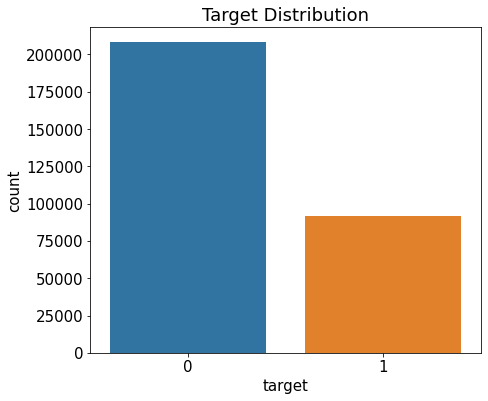

In [11]:
mpl.rc('font', size =15)
plt.figure(figsize=(7,6))

ax = sns.countplot(x='target', data=train)
ax.set_title('Target Distribution')

In [12]:
rectangle = ax.patches[0]
print('사각형 높이:', rectangle.get_height())
print('사각형 너비:', rectangle.get_width())
print('사각형 왼쪽 테두리의 x축 위치:', rectangle.get_x())


사각형 높이: 208236
사각형 너비: 0.8
사각형 왼쪽 테두리의 x축 위치: -0.4


In [13]:
print('텍스트 위치의 x좌표:', rectangle.get_x() + rectangle.get_width()/2.0)
print('텍스트 위치의 y좌표:', rectangle.get_height() + len(train)*0.001)

텍스트 위치의 x좌표: 0.0
텍스트 위치의 y좌표: 208536.0


Text(0.5, 1.0, 'Target Distribution')

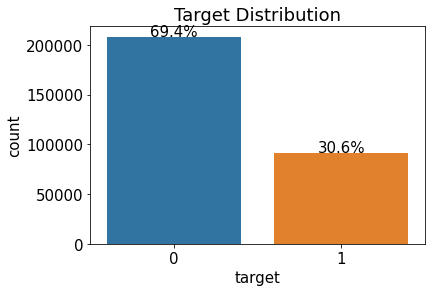

<Figure size 504x432 with 0 Axes>

In [14]:
def write_percent(ax,total_size):
    '''도형 객체를 순회하며 막대 상단에 타깃값 비율 표시'''
    
    for patch in ax.patches:
        height = patch.get_height()
        width = patch.get_width()
        left_coord = patch.get_x()
        percent = height/total_size*100
        
        ax.text(x=left_coord + width/2.0, y = height + total_size*0.001, s = f'{percent:1.1f}%', ha='center')
        
    plt.figure(figsize = (7,6))
ax = sns.countplot(x='target', data = train)
write_percent(ax,len(train))
ax.set_title('Target Distribution')

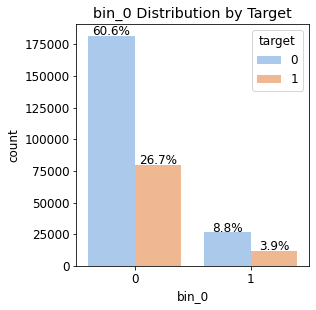

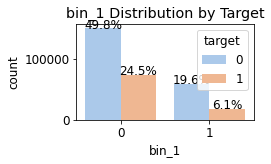

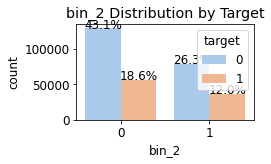

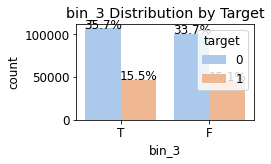

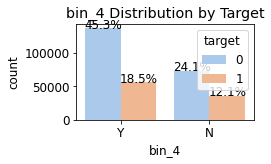

<Figure size 504x432 with 0 Axes>

In [15]:
import matplotlib.gridspec as gridspec

mpl.rc('font', size = 12)
grid = gridspec.GridSpec(3,2)
plt.figure(figsize = (10,16))
plt.subplots_adjust(wspace=0.4,hspace=0.3)

bin_features=['bin_0','bin_1','bin_2','bin_3','bin_4']

for idx, feature in enumerate(bin_features):
    ax = plt.subplot(grid[idx])
    
    sns.countplot(x=feature,data=train,hue='target',palette='pastel',ax=ax)
    
    ax.set_title(f'{feature} Distribution by Target')
    write_percent(ax,len(train))

In [16]:
pd.crosstab(train['nom_0'], train['target'])

target,0,1
nom_0,,
Blue,72914,23252
Green,85682,41659
Red,49640,26853


In [17]:
crosstab = pd.crosstab(train['nom_0'], train['target'], normalize='index')*100
crosstab

target,0,1
nom_0,,
Blue,75.820976,24.179024
Green,67.285478,32.714522
Red,64.894827,35.105173


In [18]:
crosstab = crosstab.reset_index()
crosstab

target,nom_0,0,1
0,Blue,75.820976,24.179024
1,Green,67.285478,32.714522
2,Red,64.894827,35.105173


In [19]:
def get_crosstab(df, feature):
    crosstab = pd.crosstab(df[feature], df['target'],normalize='index')*100
    crosstab = crosstab.reset_index()
    return crosstab

crosstab = get_crosstab(train, 'nom_0')
crosstab

target,nom_0,0,1
0,Blue,75.820976,24.179024
1,Green,67.285478,32.714522
2,Red,64.894827,35.105173


In [20]:
def plot_pointplot(ax,feature, crosstab):
    ax2 = ax.twinx()
    ax2 = sns.pointplot(x=feature, y=1, data=crosstab, order=crosstab[feature].values,color='black',legend=False)
    ax2.set_ylim(crosstab[1].min()-5, crosstab[1].max()*1.1)
    ax2.set_ylabel('Target 1 Ratio')

In [21]:
def plot_cat_dish_with_true_ratio(df, features, num_rows, num_cols, size=(15,20)):
    plt.figure(figsize=size)
    grid = gridspec.GridSpec(num_rows, num_cols)
    plt.subplots_adjust(wspace=0.45, hspace=0.3)
    
    for idx, feature in enumerate(features):
        ax = plt.subplot(grid[idx])
        crosstab = get_crosstab(df,feature)
        
        sns.countplot(x=feature, data=df, order=crosstab[feature].values, color='skyblue', ax=ax)
        
        write_percent(ax, len(df))
        plot_pointplot(ax, feature, crosstab)
        ax.set_title(f'{feature} Distribution')

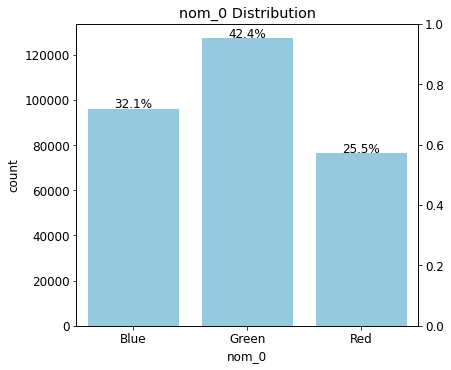

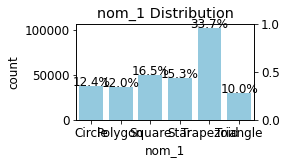

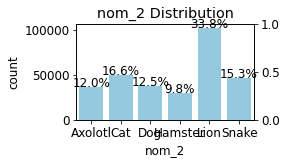

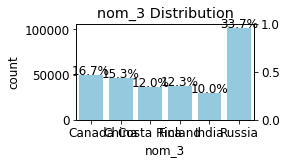

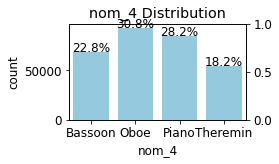

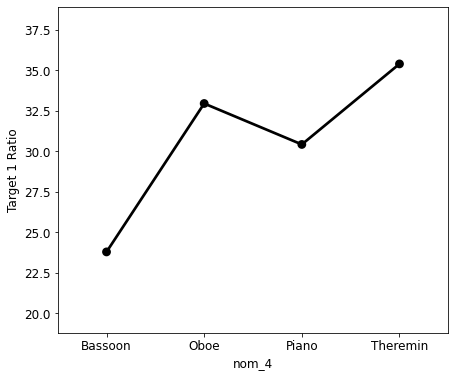

In [22]:
nom_features = ['nom_0', 'nom_1','nom_2', 'nom_3','nom_4']
plot_cat_dish_with_true_ratio(train, nom_features, num_rows=3,num_cols=2)

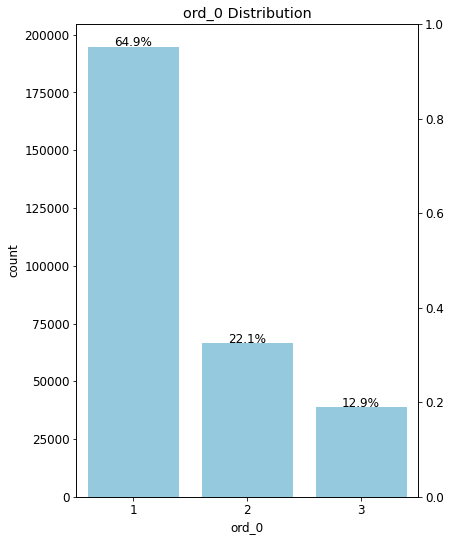

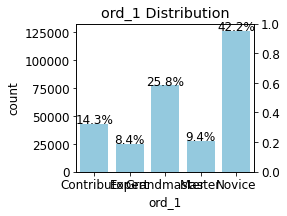

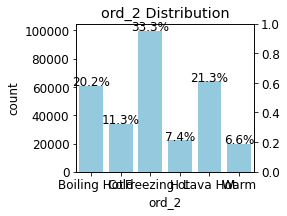

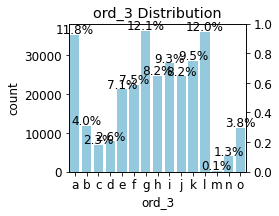

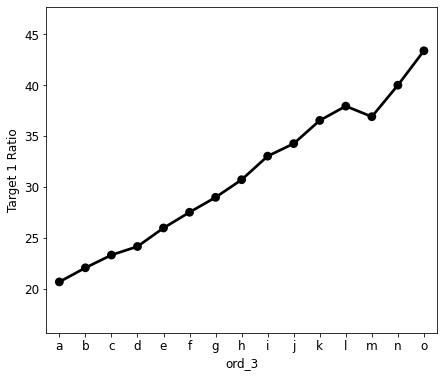

In [23]:
ord_features = ['ord_0','ord_1','ord_2','ord_3']
plot_cat_dish_with_true_ratio(train, ord_features, num_rows=2,num_cols=2)